### [뉴스 클러스터링](https://school.programmers.co.kr/learn/courses/30/lessons/17677)

- 기존 코드와 성능

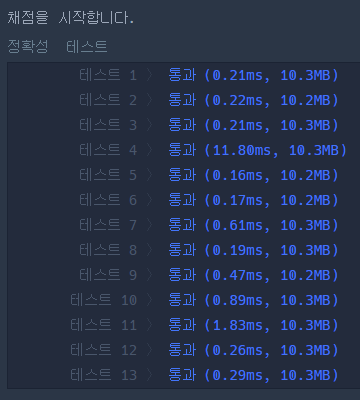

In [ ]:
import re

# 영어를 소문자로 변환하고, 인식하기 쉽도록 그 외 글자를 @로 치환
def preprocessing(str1, str2) :
    str1 = str1.lower()
    str2 = str2.lower()

    str1 = re.sub(r"[^a-z]","@", str1)
    str2 = re.sub(r"[^a-z]","@", str2)

    return str1, str2

def solution(str1, str2):
    
    str1, str2 = preprocessing(str1, str2)
    
    # 만약 중간에 @가 포함되어 있으면 그 두 글자 집합은 제외
    list1 = [str1[i:i+2] for i in range(len(str1)-1) if not "@" in str1[i:i+2]]
    list2 = [str2[i:i+2] for i in range(len(str2)-1) if not "@" in str2[i:i+2]]
    
    ### 숏컷 1 : 만약 두 리스트가 같으면 65536을 출력하고 종료
    list1.sort()
    list2.sort()
    
    if list1 == list2 :
        return 65536
    
    # 교집합과 합집합의 경우의 수를 모두 구한 뒤, 각 경우에 해당하는 수를 카운트
    # 카운트한 값들을 기준으로 교집합은 최소, 합집합은 최대를 기준으로 합산
    inter = list(set(list1) & set(list2))
    union = list(set(list1) | set(list2))
    
    ### 숏컷 2 : 만약 교집합이 0이면 0을 출력하고 종료 
    if not inter :
        return 0

    inter_sum = sum([min(list1.count(i), list2.count(i)) for i in inter])
    union_sum = sum([max(list1.count(u), list2.count(u)) for u in union])

    return int((inter_sum/union_sum) * 65536)

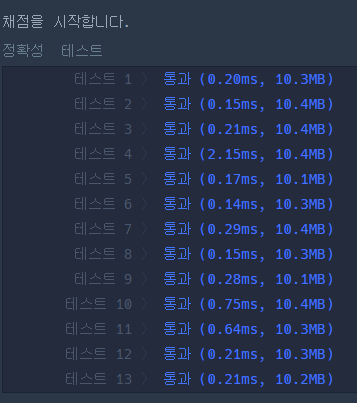

In [ ]:
import re
from collections import Counter

def preprocessing(string) :
    string = string.upper()
    pairs = [string[i:i+2] for i in range(len(string)-1) if re.match('^[A-Z]{2}$', string[i:i+2])]
    group = Counter(pairs)

    return group

def solution(str1, str2):
    
    group1, group2 = preprocessing(str1), preprocessing(str2)
    
    inter = sum((group1 & group2).values())
    union = sum((group1 | group2).values())

    return int((inter/union) * 65536) if union else 65536

### [k진수에서 소수 개수 구하기](https://school.programmers.co.kr/learn/courses/30/lessons/92335)

소수 판별에서 2와 3을 먼저 처리한 후, 그 이후의 소수 후보는 6의 배수와 그 주변 숫자들만 고려해도 충분

- 모든 정수는 6k, 6k+1, 6k+2, 6k+3, 6k+4, 6k+5 형태로 표현 가능  
- 6k, 6k+2, 6k+4는 2로 나누어 떨어지고, 6k+3은 3으로 나누어 떨어짐  
  따라서 소수가 될 수 있는 후보는 6k+1과 6k+5인데, 6k+5는 6(k+1)-1와 동일  
- 이 패턴을 6k ± 1이라고 표현 가능
- 코드에서는 5부터 시작하여 6씩 증가시키면서,   
  각 단계에서 i (6k-1)와 i+2 (6k+1)를 검사하는 방식으로 불필요한 계산을 줄이는 식으로 구현

In [ ]:
def decimal_to_base(decimal_number, base):
    if decimal_number == 0:
        return '0'
    digits = "0123456789ABCDEF"
    string = ""
    while decimal_number:
        decimal_number, remainder = divmod(decimal_number, base)
        string = digits[remainder] + string
    return string

def is_prime(n):
    if n <= 1:
        return False 
    if n <= 3:
        return True  
    if n % 2 == 0 or n % 3 == 0:
        return False
    # 5부터 √n까지 6씩 증가하면서 검사 (6k ± 1 패턴)
    for i in range(5, int(n**0.5) + 1, 6):
        if n % i == 0 or n % (i + 2) == 0:
            return False
    return True

def solution(n, k):
    
    base = decimal_to_base(n, k)
    target = [x for x in base.split('0') if x and is_prime(int(x))]    
    return len(target)